In [1]:
<a href="https://colab.research.google.com/github/rkaur22/eda_project_solo/blob/main/EDA.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SyntaxError: invalid syntax (<ipython-input-1-f7a52a503679>, line 1)

# EDA

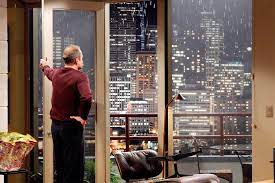

## Buying a House in King County
### Stakeholder is a Buyer: Jennifer Montgomery
- High budget, wants to show off
- Timing within a month
- Waterfront 
- Renovated 
- High grades year

### Short description about the columns present in the dataset
- Column Names and descriptions for King County Data Set

| Column name                | Description of column |
| -------------------        | --------------------| 
|id                          | unique identified for a house |
|date                        | house was sold  |
|price                       | is prediction target |
|bedrooms                    | Number of bedrooms |
|bathrooms                   | Number of bathrooms |
|sqft_living                 | footage of the home |
|sqft_lots                   | footage of the lot |
|floorsTotal                 | floors (levels) in house |
|waterfront                  | House which has a view to a waterfront |
|view                        | Has been viewed |
|condition                   | How good the condition is ( Overall ) |
|grade                       | overall grade given to the housing unit, based on King County grading system |
|sqft_above                  | square footage of house apart from basement |
|sqft_basement               | square footage of the basement |
|yr_built                    | Built Year |
|yr_renovated                | Year when house was renovated |
|zipcode                     | zip |
|lat                         | Latitude coordinate |
|long                        | Longitude coordinate |
|sqft_living15               | The square footage of interior housing living space for the nearest 15 neighbors |
|sqft_lot15                  | The square footage of the land lots of the nearest 15 neighbors |

# 1. Importing libraries and Data
- Required libraries are imported 
- Data is loaded
- First look into the data 

In [54]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [55]:
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


## 2. Data Cleaning
### Check for data types, duplicates, NaNs
For each of the column data types are looked into and transformed into corrected types wherever required
- date from object to date-time format
- month column is created from the date column

In [56]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [57]:
# change "date" dtype to datetime with format %d/%m/%Y
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['month'] = df['date'].dt.month


In [58]:
# sqft_basement has object/str data type which should not be the case, so we will convert it into float
type(df['sqft_basement'][0])
# replacing the '?' with NaN
df['sqft_basement'] = df.sqft_basement.replace('?',np.NaN)
# now changing the data type from object/string to float
df = df.astype({'sqft_basement': float})

In [59]:
#check for the duplicates
df.duplicated().value_counts()
#There aren't any duplicates

False    21597
dtype: int64

### Questions?  Assumptions! Testing.
### Questions 
  - How many houses fall in the category of High budget?
  - Are houses with waterfront have higher grades and renovated ?
  - How grades affect the rise in price for a House ?
  - Are there renovated houses available ?

### Assumptions
 - Houses are expensive in the city center and near the waterfront and not many falls into this category.
 - Prices are higher for houses with waterfront.
 - Grades determining the quality of material used in the house leads to higher price.
 - Houses built in 2000's or renovated in the same years are expected to cost more.

### Testing
 - Houses are sorted with price from high to low.
 - Only houses having waterfront are taken further for data analysis.
 - Looked for renovation in the data and sorted with the grades.
 - Recommendations are presented at the end.


## 3. Data analysis and Visualization
### Statistics
- Lets have a look into the statistics 

In [60]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,...,21597.000,21143.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,...,1788.597,291.852,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284,6.574
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,...,827.760,442.498,29.375,399.946,53.513,0.139,0.141,685.230,27274.442,3.115
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,1.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,...,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,4.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,...,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,6.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,...,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,9.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,...,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,12.000


Some insights into the Data:
- Focus is mainly on the **price, grade, renovation** and into Zip codes for finding the time frame
- There are total of 21597 entries
- Average cost of the house is 540296$ while the max is 7700000$
- Waterfront is categorical: 1.0 = with and 0.0 = without (count is different)
- Grade has max value of 13 with an average of 7.0
- Renovation done latest is in 2015
- There seem to be an anomaly in the bedrooms

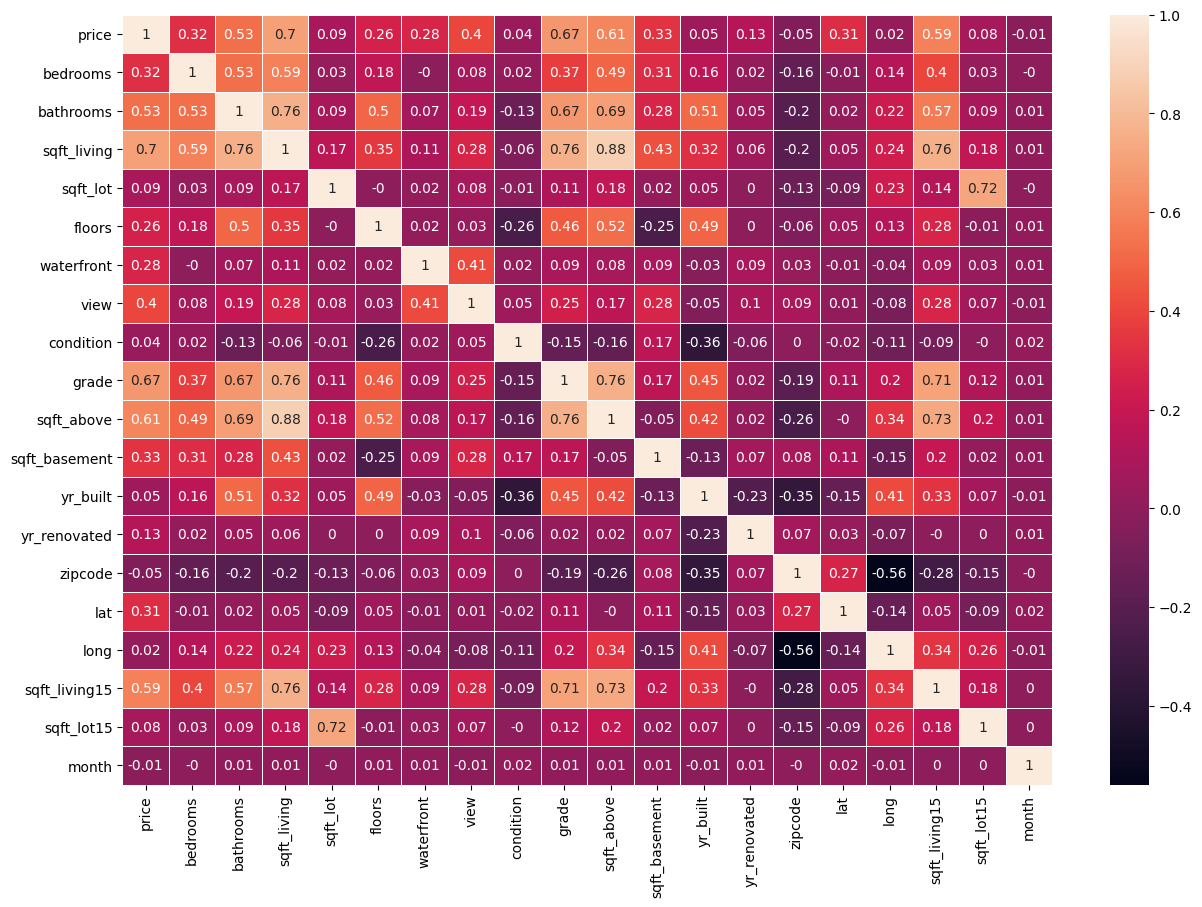

In [81]:
# Correlation matrix

df_corr = df.corr().iloc[1:,1:]

plt.subplots(figsize=(15,10))
sns.heatmap(df_corr.round(2),annot=True, linewidths = 0.5);

In [62]:
df.query("bedrooms == 33") # check for its index
df.drop(15856, axis=0, inplace = True) # drop the row 
# shape of the df reduces to (21596, 22)

#### Which month has most sales in the 2014-2015?

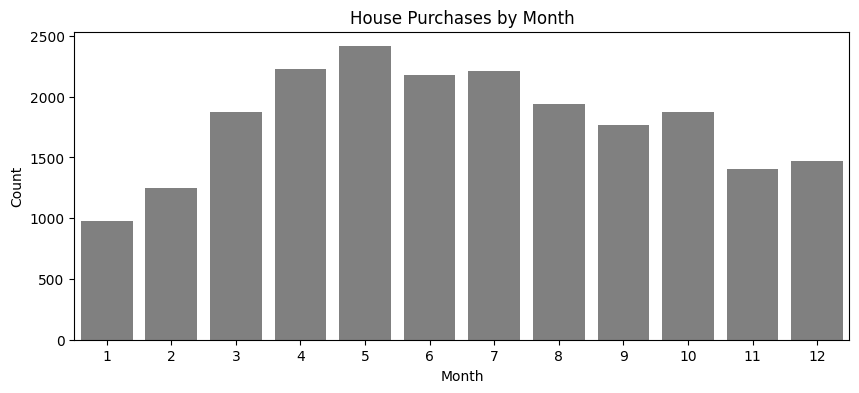

In [63]:
month_gp = df.groupby("month").size()

plt.figure(figsize=(10,4))

month_plt = sns.barplot(month_gp.index, month_gp.values, color='grey')
month_plt.set(xlabel="Month", ylabel="Count", title="House Purchases by Month")
plt.show()

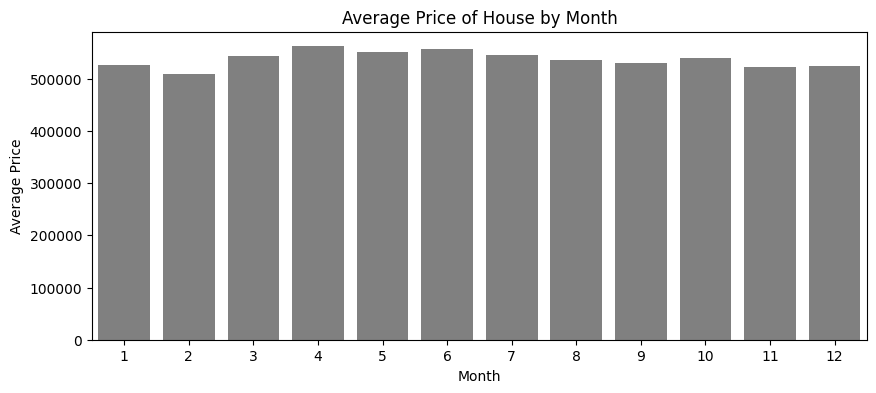

In [64]:
plt.figure(figsize=(10,4))

month_price = df.groupby("month")["price"].mean()
avg_price = sns.barplot(month_price.index, month_price.values, color = "grey")
avg_price.set(xlabel="Month", ylabel="Average Price", title="Average Price of House by Month")
plt.show()

Number of houses sold in the summer compared to others. But the prices of houses did not change over the year and are seen to be stable throughout the months. Therefore, date or time does not contribute much to the further analysis of data.

**Price analysis for the houses having Waterfront**
- Considering all those id's that have waterfront and ignoring or removing those where data is either not available or have no waterfront

In [65]:
# sort the prices from most expensive 
df.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
7245,6762700020,2014-10-13,7700000.000,6,8.000,12050,27600,2.500,0.000,3.000,...,8570,3480.000,1910,1987.000,98102,47.630,-122.323,3940,8800,10
3910,9808700762,2014-06-11,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,7680,2360.000,1940,2001.000,98004,47.650,-122.214,3930,25449,6
9245,9208900037,2014-09-19,6890000.000,6,7.750,9890,31374,2.000,0.000,4.000,...,8860,1030.000,2001,0.000,98039,47.630,-122.240,4540,42730,9
4407,2470100110,2014-08-04,5570000.000,5,5.750,9200,35069,2.000,0.000,0.000,...,6200,3000.000,2001,NaN,98039,47.629,-122.233,3560,24345,8
1446,8907500070,2015-04-13,5350000.000,5,5.000,8000,23985,2.000,0.000,4.000,...,6720,1280.000,2009,0.000,98004,47.623,-122.220,4600,21750,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,2014-05-08,82500.000,2,1.000,520,22334,1.000,0.000,0.000,...,520,0.000,1951,0.000,98168,47.480,-122.296,1572,10570,5
8267,3883800011,2014-11-05,82000.000,3,1.000,860,10426,1.000,0.000,0.000,...,860,0.000,1954,0.000,98146,47.499,-122.341,1140,11250,11
16184,3028200080,2015-03-24,81000.000,2,1.000,730,9975,1.000,NaN,0.000,...,730,0.000,1943,0.000,98168,47.481,-122.315,860,9000,3
465,8658300340,2014-05-23,80000.000,1,0.750,430,5050,1.000,NaN,0.000,...,430,0.000,1912,0.000,98014,47.650,-121.909,1200,7500,5


In [66]:
df.waterfront.value_counts()

0.000    19074
1.000      146
Name: waterfront, dtype: int64

In [67]:
#keep only those values which have waterfront
wf_df = df.query('waterfront == 1.0')#.sort_values('price', ascending = False, inplace = True)
#sort the df from highest price to lowest
wf_df.sort_values('price', ascending = False, inplace = True)
wf_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
3910,9808700762,2014-06-11,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,7680,2360.000,1940,2001.000,98004,47.650,-122.214,3930,25449,6
1313,7558700030,2015-04-13,5300000.000,6,6.000,7390,24829,2.000,1.000,NaN,...,5000,2390.000,1991,0.000,98040,47.563,-122.210,4320,24619,4
1162,1247600105,2014-10-20,5110000.000,5,5.250,8010,45517,2.000,1.000,4.000,...,5990,2020.000,1999,0.000,98033,47.677,-122.211,3430,26788,10
8085,1924059029,2014-06-17,4670000.000,5,6.750,9640,13068,1.000,1.000,4.000,...,4820,4820.000,1983,2009.000,98040,47.557,-122.210,3270,10454,6
2624,7738500731,2014-08-15,4500000.000,5,5.500,6640,40014,2.000,1.000,4.000,...,6350,290.000,2004,0.000,98155,47.749,-122.280,3030,23408,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11544,2013802030,2014-09-11,357000.000,3,2.000,2460,53882,1.000,1.000,4.000,...,2460,0.000,1955,0.000,98198,47.381,-122.325,2660,32625,9
6096,222029026,2014-09-17,340000.000,2,0.750,1060,48292,1.000,1.000,2.000,...,560,500.000,1947,0.000,98070,47.428,-122.511,750,80201,9
16556,2923039243,2014-11-13,340000.000,4,1.000,1200,11834,1.000,1.000,3.000,...,1200,0.000,1972,0.000,98070,47.456,-122.443,1670,47462,11
1166,3523029041,2014-10-09,290000.000,2,0.750,440,8313,1.000,1.000,3.000,...,440,0.000,1943,0.000,98070,47.434,-122.512,880,26289,10


In [83]:
fig = px.scatter_mapbox(df, lat="lat", lon="long", size_max=15, zoom=9,
    size="price", width=1000, height=600)
fig.update_layout(margin=dict(l=20, r=20, t=25, b=20),
    mapbox_style="open-street-map",title="Total number of houses",title_font_size= 16)
fig.show();

In [70]:
fig = px.scatter_mapbox(wf_df, lat="lat", lon="long", size_max=15, zoom=9,#, color_continuous_scale="bluered",
     size="price", width=1000, height=600)
fig.update_layout(margin=dict(l=20, r=20, t=25, b=20),
    mapbox_style="open-street-map",title="Houses with Waterfront",title_font_size= 16)
fig.show();

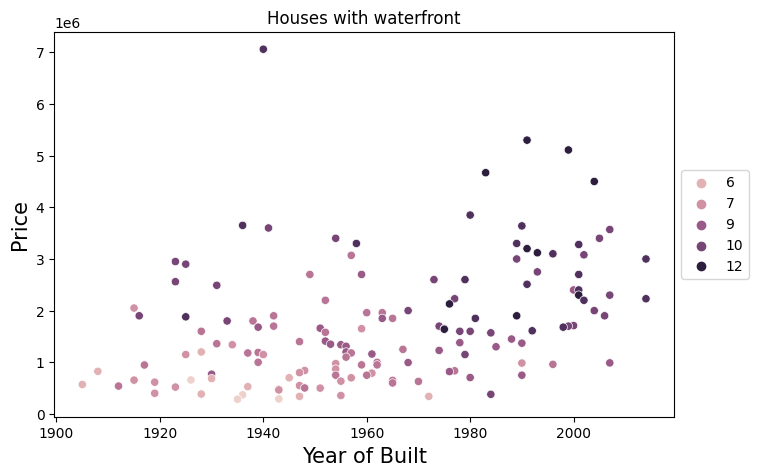

In [71]:
plt_wf=sns.scatterplot(data=wf_df, x="yr_built", y="price", hue="grade")
plt_wf.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plt_wf.set(title = 'Houses with waterfront')
plt_wf.set_xlabel("Year of Built", fontsize = 15)
plt_wf.set_ylabel("Price", fontsize = 15);

Houses have grades higher built in 1980's compared to those built in early 1900's.

**Let's look into grades**
- There isn't any null values in the *grade* col of wf_df dataframe
- Let us look at the renovated year, which has 25 NaNs
- Number of renovated houses are fewer compared to non renovated houses, one of the reasons could be that the houses built in 2000's do not need renovation at all.

In [72]:
#wf_df.query('grade.isna()')
#0 rows × 22 columns
#wf_df.query('yr_renovated.isna()')
#25 rows × 22 columns
wf_df["yr_renovated"].fillna(0, inplace=True)

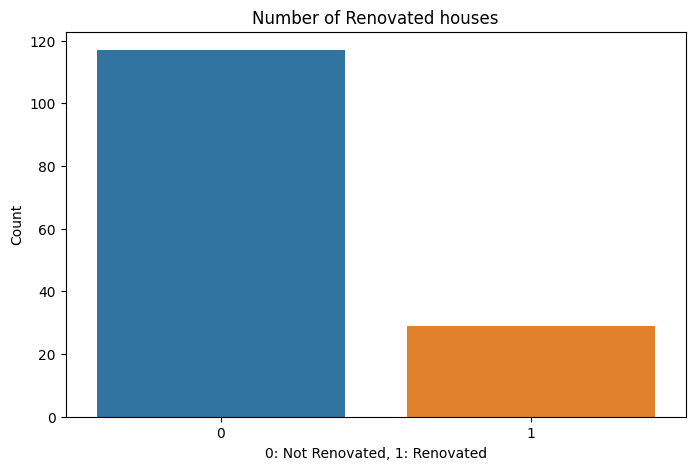

In [73]:
wf_df["is_renovated"] = np.where(wf_df.yr_renovated == 0, 0, 1)
renovate_no = wf_df.groupby("is_renovated").size()
renovate_plt = sns.barplot(renovate_no.index, renovate_no.values)
renovate_plt.set(xlabel="0: Not Renovated, 1: Renovated", ylabel="Count", title="Number of Renovated houses")
plt.show()

In [74]:
#wf_df['grade'].unique()
# array([11, 12, 10,  8,  9,  7,  6,  5])
df_fin = wf_df.query('yr_renovated != 0').sort_values('grade', ascending = False)

In [75]:
df_fin.head()
#146 rows
#29 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,is_renovated
15678,6117502230,2014-12-01,1640000.000,3,3.500,4660,21164,2.000,1.000,4.000,...,0.000,1975,1990.000,98166,47.442,-122.354,3140,24274,12,1
8085,1924059029,2014-06-17,4670000.000,5,6.750,9640,13068,1.000,1.000,4.000,...,4820.000,1983,2009.000,98040,47.557,-122.210,3270,10454,6,1
3910,9808700762,2014-06-11,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,2360.000,1940,2001.000,98004,47.650,-122.214,3930,25449,6,1
18185,3625059152,2014-12-30,3300000.000,3,3.250,4220,41300,1.000,1.000,4.000,...,1760.000,1958,1987.000,98008,47.608,-122.110,3810,30401,12,1
2862,4114601570,2014-11-18,3600000.000,3,3.250,5020,12431,2.000,1.000,4.000,...,1600.000,1941,2002.000,98144,47.593,-122.287,3680,12620,11,1


In [76]:
fig = px.scatter_mapbox(df_fin, lat="lat", lon="long", size_max=15, zoom=9, color_continuous_scale="bluered",
    color="yr_renovated", size="price",  width=1000, height=600)
fig.update_layout(mapbox_style="open-street-map",title="Houses meeting criteria",title_font_size= 20)
fig.show();

In [77]:
df_lim = df_fin[['date', 'price', 'waterfront', 'grade', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']]

In [78]:
df_rec = df_lim.query('grade > 9').sort_values('yr_renovated', ascending=False)
#f_group = df_lim[['grade','condition','yr_renovated']].groupby(['grade','condition','yr_renovated']).size()
df_rec

,date,price,waterfront,grade,condition,yr_built,yr_renovated,zipcode,lat,long
8085,2014-06-17,4670000.000,1.000,12,3,1983,2009.000,98040,47.557,-122.210
2862,2014-11-18,3600000.000,1.000,10,3,1941,2002.000,98144,47.593,-122.287
3910,2014-06-11,7060000.000,1.000,11,3,1940,2001.000,98004,47.650,-122.214
15678,2014-12-01,1640000.000,1.000,12,3,1975,1990.000,98166,47.442,-122.354
8775,2015-03-06,1800000.000,1.000,10,4,1933,1989.000,98006,47.547,-122.197
18185,2014-12-30,3300000.000,1.000,11,4,1958,1987.000,98008,47.608,-122.110


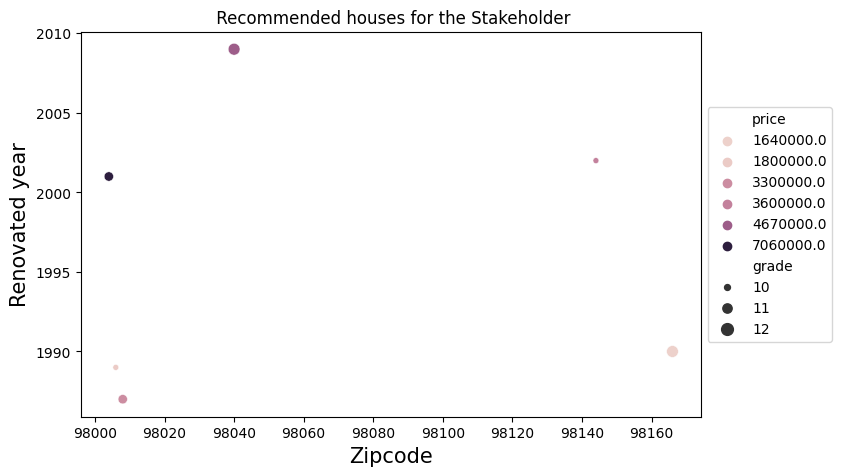

In [79]:
plot1 = sns.scatterplot(data=df_rec, x="zipcode", y="yr_renovated", hue = 'price', size = 'grade')
plot1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1)
plot1.set(title = ' Recommended houses for the Stakeholder')
plot1.set_xlabel("Zipcode", fontsize = 15)
plot1.set_ylabel("Renovated year", fontsize = 15);
#plot1.set_xticklabels([98004,98006,98008,98040,98144,98166]);

Plots on the renovation shows that renovation is not made frequently in King County but most the renovations are made after 1980's.
Considering the all the requirements from the Buyer, below are the recommendations.

- Mercer Island (98040)
- Seattle (98144)
- Bellevue (98004)
- Burien (98166)
- Bellevue (98006)
- Bellevue (98008)

In [80]:
fig = px.scatter_mapbox(df_rec, lat="lat", lon="long",
                  color_continuous_scale="bluered", 
                  size_max=10, zoom=8, 
                  color="price", size="price",hover_name="grade")
fig.update_layout(mapbox_style="open-street-map",title="House recommendations for Jennifer Montgomery",title_font_size= 30)
fig.show()